<a href="https://colab.research.google.com/github/majbrittstenbog/Assignment1/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural language processing of newspaper article titles on the first day of 16 days of activism
### Examining the sentiment of newspaper article titles that mentions "16 days of activism" on gender-based violence.


*By Majbritt Lindholt Stenbøg* \
SIMM71, assignment 1

---
*Notebook environment: Google Colab python version 3.8*\
*Hand-in date: 4th of January, 2024.*

16 days of activism is a global event over 16 days that focuses on eliminating gender-based violence, and has been started by activists back in 1991. It is supported by global organizations such as UNWomen and WHO, and starts on the 25th of november, *International Day for the Elimination of Violence Against Women* and ends the 10th of december, *International Human Rights Day*. During this period, organizations, politicians, and activists are creating awareness and debating gender-based violence prevention, which newspapers share and write about (UN Women, 2023). An important thing to be aware of when talking about topics such as violence or abuse, is how it is presented and talked about, because the sentiment of an article can affect how the reader interprets it (Karlsson et al., 2021). \
Newspaper articles can both share positive and action-inspiring articles, but also problem-oriented articles. Both articles are in their own way important, as problem-oriented information can help make aware that gender-based violence is actually a problem, and action-oriented articles can help inspire the reader to act on it. At the same time, it is interesting to look into how the sentiment of article headliners, which are supposed to draw the reader in, are, to further understand which focus characterizes the newspaper articles mentioning "16 days of activism" on the 25th of november, 2023. \
Therefore, this assignment will explore the following RQ's:
1. Which words are frequently used in the news paper articles?
2. What are the sentiment of the news paper articles seen from different models?

\
This report uses computational content analysis to examine and analyze the news paper titles. According to Neuendorf (2017b, p. 2), content analysis can be defined as a "systematic, objective, quantitative analysis of message characteristics." In this case, I am using *Natural Language Processing* to analyze the sentiment content of these news paper titles.


In [1]:
# Download packages used for this assignment:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud
import seaborn as sns

First I am going to upload the dataset used for this assignment.\
Here I specify which dataset Python should find, in this case 2023_news in the file type xlsx, so I specify the name from what it is called in
google drive. Now df is the name of my data in python. So, later in the analysis, when I refer to df, it is 2023_news. I use df.head() to see the top of the dataset, so I can see how it looks. I specify the column names, column one is ID number, column two is the news paper titles marked as text, and column three is the manually labeled sentiment I've done.\
The dataset I am using is a 100 newspaper titles from the 25th of november, 2023, downloaded from Retriever.com. The newspaper articles are from outlets around the world, but all the articles and titles are in english.

In [2]:
# Download Excel spreadsheet
!pip install gdown==4.6!gdown https://drive.google.com/uc?id=1E03ZOinQCpnadejnkkFDo43tFyhPPYkO

fp = "2023_news.xlsx"
df = pd.read_excel(fp, header=None)

# Specifying the name of the headers for the two columns in my dataset.
df.columns = ['ID','text','sentiment']
df.head()

Downloading...
From: https://drive.google.com/uc?id=1E03ZOinQCpnadejnkkFDo43tFyhPPYkO
To: /content/2023_news.xlsx
100% 12.9k/12.9k [00:00<00:00, 24.1MB/s]


,ID,text,sentiment
0,1,US embassy partners with Pak women’s rights ac...,1
1,2,No excuse for not making labour and migration ...,0
2,3,International Day for the Elimination of Viole...,1
3,4,Cross River recorded 586 cases of gender-based...,0
4,5,"Exhibition titled ""Words from the Heart"" begin...",1


# 1. Data cleaning and exploring the dataset


---



The code cell after loading the SpaCy English language model is included with the purpose of using the package SpaCy to clean the news title text rows by tokenizing, lemmatizing, removing stopwords and non-aplabetic tokens.\
The reason I do this is to prepare the text for analysis and exploring it. \
\
The first part of the code is tokenizing and lemmatizing the text into lower-case letters and a base form (lemma) of the original word. For example 'Women's' becomes 'woman'. Further, stop words are found and removed. Stop words are common words that bind the sentence together, but don't have a meaning to the sentence, such as 'and, or, if'. In the following cleaned data I can see that spacy also recognizes 'US' as a stopword and removes it, which is not ideal as US is an indication of the country USA and not a common word. Therefore, I added a part to the code telling SpaCy not to remove the word "us". The last part of the code is removing numbers and signs.

In [3]:
# Load spaCy's English language model
!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

2024-01-04 11:13:55.994903: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-04 11:13:55.994967: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-04 11:13:55.997412: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-04 11:14:00.426560: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 38.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
def spacy_clean_text(doc):
    # Tokenize, lemmatize, remove stop words and non-alphabetic tokens
    tokens = [token.lemma_.lower() for token in doc if not (token.is_stop and token.lemma_.lower() != 'us') and token.is_alpha]
    return ' '.join(tokens)

# Loading dataframe as 'data'
data = df

# Using spacy to preprocess the text column and creating a new column named 'cleaned_text'
data['cleaned_text'] = data['text'].apply(lambda x: spacy_clean_text(nlp(x)))

data.head()

,ID,text,sentiment,cleaned_text
0,1,US embassy partners with Pak women’s rights ac...,1,us embassy partner pak woman right activist
1,2,No excuse for not making labour and migration ...,0,excuse make labour migration safe fair woman
2,3,International Day for the Elimination of Viole...,1,international day elimination violence women a...
3,4,Cross River recorded 586 cases of gender-based...,0,cross river record case gender base violence m...
4,5,"Exhibition titled ""Words from the Heart"" begin...",1,exhibition title word heart begin dhaka


Now there's a new column called 'cleaned_text', which is the SpaCy cleaned text.

In [5]:
# Create a frequency table
word_freq = data['cleaned_text'].str.split(expand=True).stack().value_counts()

# Convert my word frequency table into a dataframe
word_freq_df = word_freq.to_frame().reset_index()
word_freq_df.columns = ['term','freq']
word_freq_df.head()

,term,freq
0,violence,48
1,day,34
2,woman,32
3,international,19
4,gender,19


After cleaning the text I can plot a word frequency table, as shown above. The most frequent word is 'violence', which is not surprising, as the main focus of 16 days of activism is to end gender-based violence. To better visualize this, I can plot the 10 most frequent words.

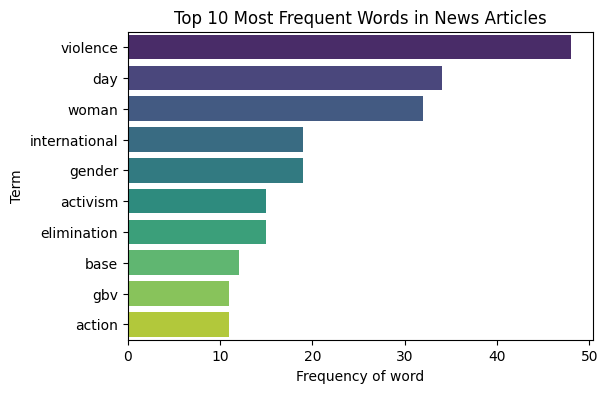

In [6]:
# Plotting the top N words
top_n = 10
plt.figure(figsize=(6, 4))
sns.barplot(x='freq', y='term', data=word_freq_df.head(top_n), palette='viridis')

plt.title(f'Top {top_n} Most Frequent Words in News Articles')
plt.xlabel('Frequency of word')
plt.ylabel('Term')

plt.show()

The plot of word frequencies indicate again that violence is the most frequent word. Interestingly, woman is also high on the list, which might indicate that the news articles more often refer to 'violence against women' than 'gender-based (term: gender and base) violence' or 'gbv' (Gender-Based Violence). \
Further, I can create a wordcloud to both see the frequency of the used words and the less used words.\
\
In order to create the wordcloud, I downloaded NLTK (Natural Language Toolkit Library) data. This is a toolkit for Python for natural language processing (Kedia & Rasu, 2020: 26). Later, we will also use NLTK for the TF-IDF vectorizer matrix. For a wordcloud, we don't want stopwords appearing and by using the WordNetLemmatizer we reduce the words into it's roots form, so we don't have the same word in multiple parts of the wordcloud, but instead have it represented once, which also gives a clearer picture of how often a words frequency is in the excel spreadsheet. This is also what we did with the SpaCy tool. Of course, lemmatizing the texts means shedding the words some of its meaning, but for a wordcloud or frequency table, it is useful (Kedia & Rasu, 2020: 28). Later, for the sentiment analysis, the words will not be lemmatized.

In [29]:
# Download necessary NLTK data for my wordcloud
import nltk
nltk.download('popular')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

I created the following wordcloud by finding the base code for a wordcloud, and used ChatGPT to modify my code, such as colormap and size.

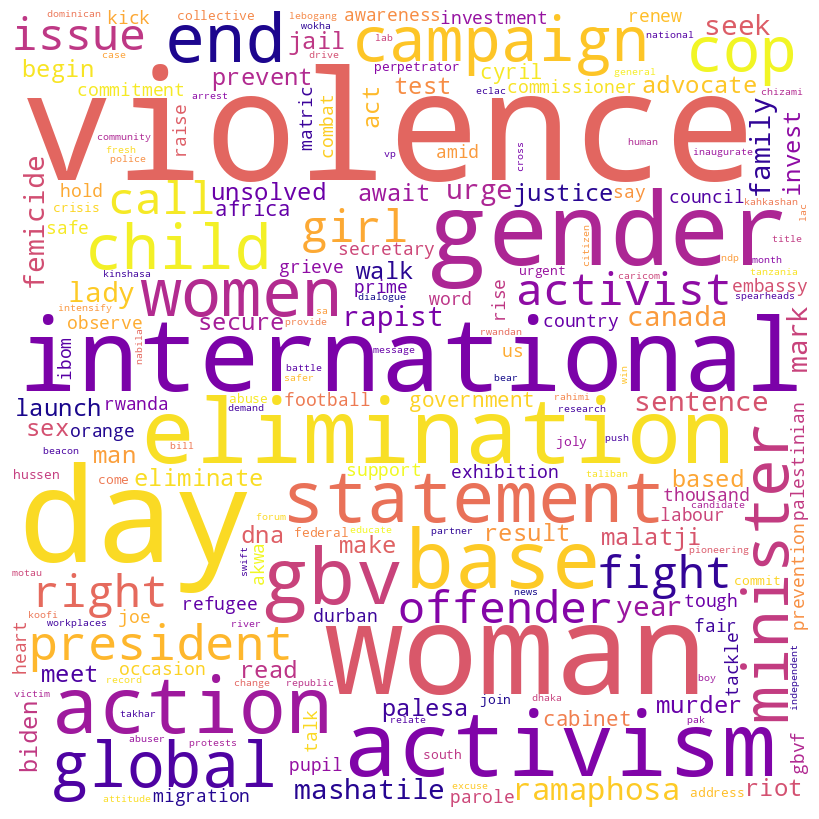

In [8]:
# Creating a wordcloud
wordcloud = WordCloud(collocations=False,
                      colormap='plasma',
                      width=800, height = 800,
                      background_color = 'white',
                      stopwords = stopwords.words('english'),
                      min_font_size = 10).generate(" ".join(df['cleaned_text']))

# plot of wordcloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

As expected it is visible in the wordcloud that words with the highest frequency (such as violence, woman, day) are the largest words on the wordcloud. What's interesting is that I can use the wordcloud to see if the cleaned text include incorrect lemmatized words (maybe because they are actually names, such as 'akwa') and also see words that are small, that I would expect to be larger since they are highly relevant for the theme (such as support, justice, urge and advocate). The wordcloud also gives and indication of what the news headliners have in common, a theme is starting to become visible, as words associated with activism shows a lot, but also a lot of political words are taking up a lot of space.

# 2. Sentiment analysis (Naive Bayes)

---


### *Split training and test data*
The analysis of the texts with sentiment analysis will be split into two parts, and compared at the end. The first part I am using Naive Bayes multinomial sentiment analysis, where I am splitting the dataset and training my own model. The second part I will be using the pre-trained transformer, Hugging Face. Lastly, I will compare the two models performances to my own sentiment classification.


**Sentiment analysis**\
Sentiment analysis will be used to analyse text and assess the sentiment of the sentence. Often it determines whether a document is either positive, negative or neutral (Kedia & Rasu, 2020: 158). In this case, the sentiment will be binary; either positive = 1 or negative = 0. By sentiment I mean whether the headline of the news article has a negative or positive meaning or tone. It can be tricky for a computer to tell wether something has a positive or negative meaning, and that is why it is important to use (for social scientists at least) a well-trained library or transformer for the task. Preferably, a library/transformer, that has been trained on the same type of textdata, etc. news article headliners (or even better, news article headliners referring to 16 days of activism).

**TF-IDF measures**\
TF-IDF stands for Term Frequency - Inverse Document Frequency and are used to weigh the terms in the text, so that important words of meaning (that might not occur that often in the text) are included. The output number of our TF-IDF measure is the weigthed number of relevance a word has to the texts meaning. TF takes into account how often a word appears in a text. As this is news article headlines and not long bodies of texts, most of the words don't appear a lot, except the most frequent words displayed earlier in the term frewuency table. IFD takes into account the meaning of the less frequent words, as it measures the importance of a word in the news article headlines (Kedia & Rasu, 2020: p. 85). \
\
**Human Coding versus CATA coding**\
As mentioned ealier, I included my own 'human coded' sentiment, with the purpose of comparing it to the Computer Aided Text Analysis by Multinomial Naive Bayes and later Huggin Face transformers sentiment predictions. Usually, to obtain intercoder reliability and thus create a sentiment analysis with a reasonable validity, I would have created a codebook and had one or more persons code the same texts with the basis of how the codebook defined whether something should be coded as positive or negative (Neuendorf, 2017c). In this case, as it is only me coding and it is to test whether my own perception of the article headliners are negative or positive, I have not made a codebook. A somewhat similar codebook, or dictionary, is needed for the algorithm as well in order for it to predict sentiment (Neuendorf, 2017a). In this case, we use supervised training and later a pre-trained model through transformers.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a TF-IDF Vectorizer instance with NLTK stopwords
nltk_stopwords = stopwords.words('english')
tfidf_vectorizer = TfidfVectorizer(stop_words=nltk_stopwords)

# Choosing row 0 - 4 (first five rows) to display
documents = df['text'].iloc[:5]

# Transform and convert to dataframe
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.index = documents.index

tfidf_df

,10,586,action,activist,based,begins,call,cases,commissioner,cross,...,partners,recorded,rights,river,safe,titled,us,violence,women,words
0,0.000000,0.000000,0.000000,0.393795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.393795,0.000000,0.393795,0.000000,0.000000,0.000000,0.393795,0.000000,0.263729,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.393795,0.000000,0.000000,0.000000,0.263729,0.000000
2,0.000000,0.000000,0.404907,0.000000,0.000000,0.000000,0.404907,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.326676,0.271171,0.000000
3,0.306413,0.306413,0.000000,0.000000,0.306413,0.000000,0.000000,0.306413,0.306413,0.306413,...,0.000000,0.306413,0.000000,0.306413,0.000000,0.000000,0.000000,0.247212,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.000000,0.408248


The first part of the code I use NLTK stopwords to create the TF-IDF vectorizer. The next part is fitting and tranforming the 'text' documents into a matrix, where the matrix split every word into a column and can display the TF-IFD weighted value for each word. It is then converted into a dataframe in order to display the matrix. As seen in the matrix, the weighted value of a word is only displayed in the row where the word appears. The sorting of the columns is alpabetical.

**Supervised Learning**\
When using Naive Bayes in the first part of our sentiment analysis, we are using supervised learning. Supervised learning involves training our algorithm/model on labeled data - which is the split dataset (Kedia & Rasu, 2020: 148). This way, we are 'feeding' the algorithm with our training dataset, in order for the algorithm to find patterns with the purpose of training the alorithm to predict the sentiment of the test dataset.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Making x the text data, and y the binary sentiment data that i coded manually.
X = df['text']
y = df['sentiment']

# Perform TF-IDF vectorization (preprocessing)
tfidf_vectorizer = TfidfVectorizer(max_features=100)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Splitting the dataset into testing and training
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.30, random_state=42)

 As this is a small dataset of short text I've set the  max_features at 100. I Decided to keep it on 100 after trying to adjust it up and down a few times. It could possibly also have been excluded, as there's so little text in our dataset. Max features helps limiting the vocabulary size so that unimportant words are not included in our TF-IDF vectorization. This way, I avoid overfitting my model and feeding the algorithm with unimportant information. Then the dataset is split into two datasets; training (X_train & y-train) and testing (x_test & y_test). The purpose of splitting the dataset into two datasets is to cross-validate and thus evaluate the model's performance (Kedia & Rasu, 2020: 161).
 I have set the test size to .30 as my dataset is so small (100 rows). The test size then consist of 30 rows and the training size is 70 rows. I also include my own manually coded sentiment, y, which is also split into both datasets. This is to train and compare with the model, to see if it is successfully predicting the sentiment.

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train the Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict X_test with trained model
y_pred = clf.predict(X_test)

From sklearn I am importing the Naive Bayes multinomial training. The clf.fit() code is where I am fitting (learning) Naive Bayes how to predict sentiment. The last part, y_pred is where I obtain the predicted sentiment from the trained model, which will be displayed later in the confusion matrix.

In [12]:
# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.93
Precision: 0.93
Recall: 1.00
F1-score: 0.96


**Model evaluation** \
The displayed four numbers are used to evaluate my Naive Bayes model performance. Accuracy displays the ratio of correctly predicted sentiment. For this model it's close to 100, which is very good. At the same time, it is also important to keep in mind that the dataset is small, and might change if there was a 1000 rows of text. Further, it also changes slightly, if the number of max_features are changed to a lower number. Precision shows that it was 0.93 accurate in identifying the positive sentiment of the whole datasets positive sentiments. This means that the model did not predict that many false positives, which is good. Recall is also high, which is good, which means the model has minimal false negatives. F1-score shows a mean between precision and recall, which is also high. In general, the model seems to be performing well.

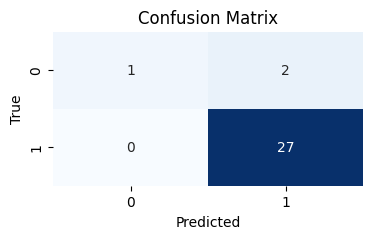

In [13]:
# Step 7: Create and plot a confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

My confusion matrix also confirms the model evaluation, as only few news headliners are given the incorrect sentiment. For positive sentiment there are no incorrect predictions, and for negative are two incorrectly labeled as 1. I expected that the model would predict more rows negatively, as the dataset consists of a lot of negative-sounding words (as seen in the wordcloud and frequency table) such as violence, but it seems that the model more often labels the news headliners positively.

In [14]:
# I got this code from chatGPT
feature_names = tfidf_vectorizer.get_feature_names_out()
most_informative_features = np.argsort(clf.feature_log_prob_[1])[::-1][:10]
print("Most informative features:")
for feature_index in most_informative_features:
    print(feature_names[feature_index])

Most informative features:
violence
against
women
to
gender
of
for
based
the
day


I wanted to display which words the algorithm gave most meaning. Therefore I made this code with ChatGPT. What's interesting is that some words that would normally be seen as stopwords (to, of, for, the) are part of the top ten most informative words, which tells me that either max_featues could be adjusted, or the text row could have been preprocessed better. I chose to use the clean 'text' column in order to keep as much meaning in the news article headlines as possible.

In [15]:
import joblib

# Saving my model and TF-IDF vectorizer to files
model_filename = 'sentiment_model.pkl'
vectorizer_filename = 'tfidf_vectorizer.pkl'

joblib.dump(clf, model_filename)
joblib.dump(tfidf_vectorizer, vectorizer_filename)

['tfidf_vectorizer.pkl']

In [16]:
# To load the model and vectorizer for inference:
loaded_model = joblib.load(model_filename)
loaded_vectorizer = joblib.load(vectorizer_filename)

# Using my saved model to predict the sentiment of the following sentence from 2021 article:
new_sample = "Vancouver secondhand shop marks 20 years of supporting women experiencing violence"
new_sample_tfidf = loaded_vectorizer.transform([new_sample])
prediction = loaded_model.predict(new_sample_tfidf)

# Sentiment labels based on the sentiment score:
sentiment_label = "Positive" if prediction == 1 else "Negative"

print(f"Predicted sentiment: {sentiment_label}")

Predicted sentiment: Positive


**Testing my model** \
The code cell I just ran is where I use my Naive Bayes trained algorithm to predict the sentiment of the sentence/text I use as an example. The sample text I use is a news article headline from 25th of november, 2021, and was found with the same search criterias as the dataset; where the headline or news article text include "16 days of activism". This is a news article text my trained model has not seen before, and includes both what I would argue are negative and positive words. The model predict the sentiment to be positive, which I agree with. Therefore I would say this model seems to be good at predicting the sentiment of the news article headliners connected to 16 days of activism.

In [17]:
# Reverse transform the TF-IDF vectors to text
reversed_texts = loaded_vectorizer.inverse_transform(X_test)

# My new dataframe with the testing dataset with my own (original) sentiment and predicted sentiments
sent_df = pd.DataFrame({'Original Text': [' '.join(text) for text in reversed_texts],
                        'Original Sentiment': y_test,
                        'Predicted Sentiment': y_pred})

# Bring in the original unaltered text from my 'df' dataframe.
original_texts = df.iloc[y_test.index]['text'].tolist()

# Add the original texts as the first column in 'sent_df'
sent_df.insert(0, 'Original Unaltered Text', original_texts)

sent_df

,Original Unaltered Text,Original Text,Original Sentiment,Predicted Sentiment
83,"Meet the cop who secured 6,548-year jail sente...",offender sex child sentence jail year 548 secu...,0,1
53,Zonta Club of Corry observes 16 Days of Activism,activism days 16 of,1,1
70,Statement by Minister of Foreign Affairs Mélan...,minister by statement on against violence of e...,1,1
45,Invest to prevent violence against Palestinian...,girls invest to against violence and women,1,1
44,Statement by President Joe Biden on the Occasi...,biden president by statement on against violen...,1,1
39,International Day for elimination of violence ...,at against violence of elimination day interna...,1,1
22,A Beacon for Safer Workplaces Amid Rising Acti...,amid activism for,1,1
80,Les Femmes Michif Otipemisiwak calls for actio...,calls as campaign activism days 16 begins base...,1,1
10,Rwanda renews call to eliminate gender-based v...,eliminate based gender to call violence,1,1
0,US embassy partners with Pak women’s rights ac...,activist rights women embassy us,1,1


Now I created a new dataframe called sent_df (for sentiment dataframe) where I collected the original text, the TF-IDF reversed text, my original manually coded sentiment and my Naive Bayes model coded sentiment. It's evident that the TF-IDF vectorizer has altered the original text a lot, and changing the max_features from 100 to a larger number would also include more text. On the other hand, making the number smaller would make the sentences even shorter and less meaningful.

# 3. Sentiment analysis with transformers (Hugging face)

---

In the second part of my sentiment analysis I will be using Hugging Face's transformers, which is a more reliable source for doing sentiment analysis. Naive Bayes is a model, where I trained it on my own dataset, and thus the model has not seen much text at this point. Therefore, it is typically not as reliable or relevant for a social scientist to use for analysis. Further, it is relevant to point out that the Naive Bayes algorithm does not look at word sequences. By using Huggin Face, we will be using a model that is transformer-based and thus pre-trained, which removes the need to train the model and makes it much more useable for automatization of the sentiment analysis.

In [18]:
!pip install -q transformers #installs transformers package to my jupyter notebook

from transformers import pipeline
from sklearn.metrics import confusion_matrix

# Load the sentiment analysis pipeline
nlp = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:82: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Error: Secret HF_TOKEN does not exist.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

As seen in the above code I didn't specify a hugging face transformer, and therefore I downloaded the default distilbert-base-uncased-finetunded-sst-2-english, which is probably the most used transformer by Hugging Face used for topic classification (HF Canonical Model Maintainers, 2022). The reason for using the default transformer is because it is sufficient for my analysis. The model works on english language, which my text is as well.

In [19]:
# Predict sentiment on the original unaltered texts
sent_df['HuggingFace Prediction'] = sent_df['Original Unaltered Text'].apply(lambda text: nlp(text)[0])

# Extract the predicted sentiment labels from the pipeline results and convert to 0 (negative) or 1 (positive)
sent_df['HuggingFace Confidence'] = sent_df['HuggingFace Prediction'].apply(lambda prediction: prediction['score'])
sent_df['HuggingFace Prediction'] = sent_df['HuggingFace Prediction'].apply(lambda prediction: 0 if prediction['label'] == 'NEGATIVE' else 1)

sent_df

,Original Unaltered Text,Original Text,Original Sentiment,Predicted Sentiment,HuggingFace Prediction,HuggingFace Confidence
83,"Meet the cop who secured 6,548-year jail sente...",offender sex child sentence jail year 548 secu...,0,1,1,0.976732
53,Zonta Club of Corry observes 16 Days of Activism,activism days 16 of,1,1,1,0.820131
70,Statement by Minister of Foreign Affairs Mélan...,minister by statement on against violence of e...,1,1,1,0.964881
45,Invest to prevent violence against Palestinian...,girls invest to against violence and women,1,1,1,0.904036
44,Statement by President Joe Biden on the Occasi...,biden president by statement on against violen...,1,1,1,0.980395
39,International Day for elimination of violence ...,at against violence of elimination day interna...,1,1,1,0.987506
22,A Beacon for Safer Workplaces Amid Rising Acti...,amid activism for,1,1,1,0.998434
80,Les Femmes Michif Otipemisiwak calls for actio...,calls as campaign activism days 16 begins base...,1,1,1,0.600727
10,Rwanda renews call to eliminate gender-based v...,eliminate based gender to call violence,1,1,1,0.936927
0,US embassy partners with Pak women’s rights ac...,activist rights women embassy us,1,1,1,0.808597


In my sent_df I have now added the predicted sentiment of the Hugging Face model, together with the confidence levels. In the dataframe, I can see a couple of differences between my own sentiment labelling, the Naive bayes model and Hugging Face. I was expecting them not aligning completely because; 1. My own sentiment labelling can be seen as the 'best version', and since the other two models are predicting (and 'computers') then I would always expect them not being able to be a 100 percent aligned with my 'human coded' sentiment. 2. Since the Naive Bayes model is only trained on a small amount of data and Hugging Face has been trained on a much larger set of data, I also expect them to be different in their quality of predictions. 3. The 'original unaltered text' and 'original text' are also different after applying some cleaning and max_features during the Naive Bayes method, and therefore the differentiating texts that the models used for predictions can also affect the output sentiment.\
The following confusion matrix for the hugging face prediction will be analyzed after the last code cell.

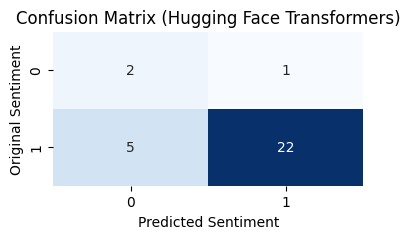

In [20]:
# Create a confusion matrix
conf_matrix_hf = confusion_matrix(sent_df['Original Sentiment'], sent_df['HuggingFace Prediction'])

# Plot the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_hf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Sentiment")
plt.ylabel("Original Sentiment")
plt.title("Confusion Matrix (Hugging Face Transformers)")
plt.show()

**Descriptive statistics**\
The following two code cells are to look into the descriptive statistics for all three sentiment columns with the purpose of comparing the three.

In [21]:
# Got this code from ChatGPT
sentiment_columns = ['Original Sentiment', 'Predicted Sentiment', 'HuggingFace Prediction']
descriptive_stats = sent_df[sentiment_columns].describe()
print(descriptive_stats)

       Original Sentiment  Predicted Sentiment  HuggingFace Prediction
count           30.000000            30.000000               30.000000
mean             0.900000             0.966667                0.766667
std              0.305129             0.182574                0.430183
min              0.000000             0.000000                0.000000
25%              1.000000             1.000000                1.000000
50%              1.000000             1.000000                1.000000
75%              1.000000             1.000000                1.000000
max              1.000000             1.000000                1.000000


In [24]:
# Got this code from ChatGPT
correlation_matrix = sent_df[sentiment_columns].corr()
print(correlation_matrix)

                        Original Sentiment  Predicted Sentiment  \
Original Sentiment                1.000000             0.557086   
Predicted Sentiment               0.557086             1.000000   
HuggingFace Prediction            0.341515             0.336601   

                        HuggingFace Prediction  
Original Sentiment                    0.341515  
Predicted Sentiment                   0.336601  
HuggingFace Prediction                1.000000  


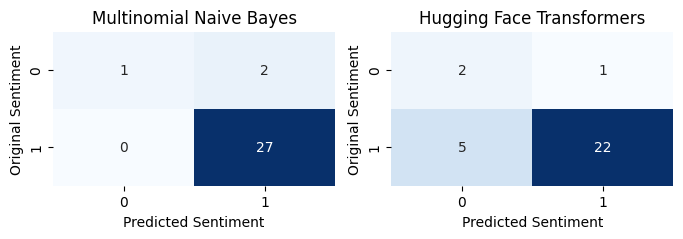

In [22]:
# Create subplots to display confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 2))
# Plot the Multinomial Naive Bayes confusion matrix
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_title("Multinomial Naive Bayes")
axes[0].set_xlabel("Predicted Sentiment")
axes[0].set_ylabel("Original Sentiment")

# Plot the Hugging Face Transformers confusion matrix
sns.heatmap(conf_matrix_hf, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[1])
axes[1].set_title("Hugging Face Transformers")
axes[1].set_xlabel("Predicted Sentiment")
axes[1].set_ylabel("Original Sentiment")

# Display the figure
plt.show()

#4. Results
---
Overall, the sentiment of both models and my own are largely positive. This means that articles posted on the 25th of november 2023 with '16 days of activism' included in text or headliners has a generally positive tone and thus does not seem as problem-oriented as one should think. At the same time, it is difficult to say whether some of the articles are problem-oriented or not, as multiple mentions politicians' names in the context of them making a speech on this day, which is neither leading the reader to think its action-oriented or problem-oriented, but instead more informative, as the headliners don't nescessarily specify the content of the speech.\
\
The sentiment predictions by the Hugging Face transformers seem to predict more negative (0) sentiments of the articles than Naive Bayes and my own sentiment labelling. This was somewhat expected that one or both models would have more negative sentiments than my own sentiment labels, as the articles are about violence. Still, Hugging Face predicted most of the sentiments correctly, compared to my own sentiment labels. The correlation matrix also shows that Hugging Face prediciton has the lowest correlation with the two other models, Whereas Naive Bayes are closer to my own sentiment. This means that there's a higher chance that Naive Bayes will predict the same as my manually coded sentiment. \
\
Further, the mean of the three sentiment analyses shows that my own sentiment analysis is the sentiment with most positive labels, as it has the highest mean. It also confirms that Hugging face has the most negative sentiment predictions. \
\
When looking at the most frequent words, 'violence' is the most frequent followed by 'day'. When predicting the sentiment of the news article texts I expected them to negative because of words used such as violence or elimination, but the word frequency table and the wordcloud also shows, that more neutral words, such as women, day, and gender, and positive words as 'activism' are changing the meaning of the news article headliners. Further, as the Naive Bayes algorithm has been trained on my manual sentiment (with was the most positive), it is also evident that the model sees more positive sentiments than negative. \
\
**Discussion** \
It is also relevant to mention that since the article headliners are from the first day of the '16 days of activism' campaign, and that the focus of the campaign is also to make a change, the criteria for exctracting the article headliners (that the text or headliner include '16 days of activism') might also be the reason why the sentiments are overwhelmingly positive. Maybe it would have been more relevant to search for texts including 'gender-based violence' on the same day as the beginning of 16 days of activism, to see how the sentiment of the articles, not nescesarrily mentioning activism, would have been.

# References:
HF Canonical Model Maintainers (2022). Distilbert-base-uncased-finetuned-sst-2-english. Hugging Face. Accessed: 13/12/23. Doi: 10.57967/hf/0181 \
\
Karlsson, N., Lila, M., Gracia, E., & Wemrell, M. (2021). Representation of Intimate Partner Violence Against Women in Swedish News Media: A Discourse Analysis. Violence Against Women, 27(10), 1499-1524. https://doi-org.ludwig.lub.lu.se/10.1177/1077801220940403 \
\
Kedia, A., & Rasu, M. (2020). Hands-On Python Natural Language Processing: Explore tools and techniques to analyze and process text with a view to building real-world NLP applications. Packt. \
\
Neuendorf, K. (2017a). An integrative approach to content analysis. In The Content Analysis Guidebook ( Second ed., pp. 36-69). SAGE Publications, Inc, https://doi.org/10.4135/9781071802878 \
\
Neuendorf, K. (2017b). Defining content analysis. In The Content Analysis Guidebook ( Second ed., pp. 1-35). SAGE Publications, Inc, https://doi.org/10.4135/9781071802878 \
\
Neuendorf, K. (2017c). Measurement and validity. In The Content Analysis Guidebook ( Second ed., pp. 121-164). SAGE Publications, Inc, https://doi.org/10.4135/9781071802878 \
\
UN Women (2023, December 8th). *16 Days of Activism against Gender-Based Violence*. https://www.unwomen.org/en/what-we-do/ending-violence-against-women/unite/16-days-of-activism